# Data Exploration

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# load data
y1 = pd.read_csv("data/y1-23-si.txt", sep="\t", header=None, names=["time", "gait"])
y2 = pd.read_csv("data/y2-29-si.txt", sep="\t", header=None, names=["time", "gait"])
y3 = pd.read_csv("data/y3-23-si.txt", sep="\t", header=None, names=["time", "gait"])
y4 = pd.read_csv("data/y4-21-si.txt", sep="\t", header=None, names=["time", "gait"])
y5 = pd.read_csv("data/y5-26-si.txt", sep="\t", header=None, names=["time", "gait"])
o1 = pd.read_csv("data/o1-76-si.txt", sep="\t", header=None, names=["time", "gait"])
o2 = pd.read_csv("data/o2-74-si.txt", sep="\t", header=None, names=["time", "gait"])
o3 = pd.read_csv("data/o3-75-si.txt", sep="\t", header=None, names=["time", "gait"])
o4 = pd.read_csv("data/o4-77-si.txt", sep="\t", header=None, names=["time", "gait"])
o5 = pd.read_csv("data/o5-71-si.txt", sep="\t", header=None, names=["time", "gait"])
pd1 = pd.read_csv("data/pd1-si.txt", sep="\t", header=None, names=["time", "gait"])
pd2 = pd.read_csv("data/pd2-si.txt", sep="\t", header=None, names=["time", "gait"])
pd3 = pd.read_csv("data/pd3-si.txt", sep="\t", header=None, names=["time", "gait"])
pd4 = pd.read_csv("data/pd4-si.txt", sep="\t", header=None, names=["time", "gait"])
pd5 = pd.read_csv("data/pd5-si.txt", sep="\t", header=None, names=["time", "gait"])



In [4]:
df= y1

/var/folders/gl/bb5xpdbn5kq4_0kqfgqqp6sr0000gn/T/ipykernel_73271/2140398259.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/var/folders/gl/bb5xpdbn5kq4_0kqfgqqp6sr0000gn/T/ipykernel_73271/2140398259.py:12: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.stripplot(
/var/folders/gl/bb5xpdbn5kq4_0kqfgqqp6sr0000gn/T/ipykernel_73271/2140398259.py:12: UserWarning: The palette list has more values (730) than needed (1), which may not be intended.
  sns.stripplot(
/var/folders/gl/bb5xpdbn5kq4_0kqfgqqp6sr0000gn/T/ipykernel_73271/2140398259.py:12: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

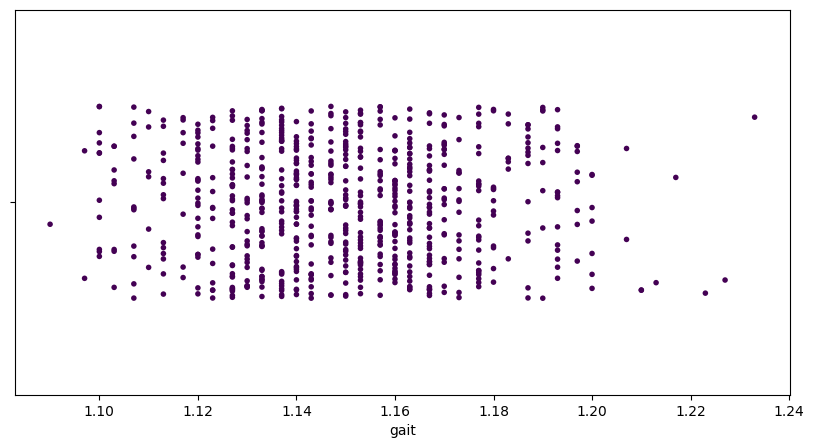

In [5]:
df = df.sort_values("time").reset_index(drop=True)

# Normalize time for color mapping
norm = plt.Normalize(df["time"].min(), df["time"].max())
cmap = plt.cm.viridis
colors = cmap(norm(df["time"]))

# Create the figure
plt.figure(figsize=(10, 5))

# Wilkinson-style dot plot using jitter
sns.stripplot(
    x=df["gait"],
    jitter=0.25,
    orient="h",
    size=4,
    palette=colors,
    edgecolor="gray",  # Optional: improves contrast
)

# Create and label the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label("Time")

plt.xlabel("Gait")
plt.title("Wilkinson Dot Plot of Gait with Time Colorbar")
plt.tight_layout()
plt.show()

In [6]:
y1

,time,gait
0,30.893,1.113
1,32.007,1.140
2,33.147,1.143
3,34.290,1.120
4,35.410,1.117
...,...,...
725,864.343,1.147
726,865.490,1.130
727,866.620,1.130
728,867.750,1.133


In [7]:
all = pd.DataFrame(columns=["time", "gait", "participant", "type"])
dfs = [y1, y2, y3, y4, y5, o1, o2, o3, o4, o5, pd1, pd2, pd3, pd4, pd5]
for i in range(len(dfs)):
    d = dfs[i]
    if i<=4:
        d['participant'] = pd.Series([f'y{i}']*len(d))
        d['type'] = pd.Series(['young healthy']*len(d))
    elif i<=9:
        d['participant'] = pd.Series([f'o{i-4}']*len(d))
        d['type'] = pd.Series(['old healthy']*len(d))
    else:
        d['participant'] = pd.Series([f'pd{i-9}']*len(d))
        d['type'] = pd.Series(['old Parkinson']*len(d))
    all = pd.concat([all, d], ignore_index=True)

/var/folders/gl/bb5xpdbn5kq4_0kqfgqqp6sr0000gn/T/ipykernel_73271/705158477.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all = pd.concat([all, d], ignore_index=True)


In [8]:
# all.to_csv("all_participants.csv", index=False)

#1

In [9]:
px.scatter(all, x='time', y='gait', color='type')

#2

In [12]:
px.scatter(all[(all['type'] == 'old healthy') & (all['gait'] <= 1.4)], x='gait', y='time', color='participant')

#3

In [30]:
px.scatter(all, x='gait', y='time', color='type')

In [13]:
fig = px.histogram(
    all,
    x="gait",
    color="type",  # Categorical variable
    nbins=30,
    barmode="overlay"  # or "group" for side-by-side bars
)
fig.show()


In [14]:
px.scatter(pd1, x='time', y='gait')

In [20]:
dfs = [y1, y2, y3, y4, y5, o1, o2, o3, o4, o5, pd1, pd2, pd3, pd4, pd5]

for i in range(len(dfs)):
    d = dfs[i].copy()
    if i <= 4:
        d['participant'] = f'y{i}'
        d['type'] = 'young healthy'
    elif i <= 9:
        d['participant'] = f'o{i-4}'
        d['type'] = 'old healthy'
    else:
        d['participant'] = f'pd{i-9}'
        d['type'] = 'old Parkinson'
    all = pd.concat([all, d], ignore_index=True)
all['time'] = pd.to_numeric(all['time'], errors='coerce')
all_sorted = all.sort_values(by=['type', 'participant', 'time']).copy()
all_sorted['gait_smoothed'] = all_sorted.groupby('participant')['gait'].transform(
    lambda x: x.rolling(window=10, min_periods=1).mean()
)

fig = px.line(
    all_sorted,
    x='time',
    y='gait_smoothed',
    color='participant',
    facet_col='type',
    facet_col_wrap=1,
    title='Smoothed Stride Interval Over Time by Participant and Group',
    labels={'gait_smoothed': 'Smoothed Stride Interval (s)', 'time': 'Time (s)'}
)

fig.update_traces(line=dict(width=1))
fig.update_xaxes(showgrid=True, title_text='Time (s)')
fig.update_layout(height=900)
fig.show()


/var/folders/gl/bb5xpdbn5kq4_0kqfgqqp6sr0000gn/T/ipykernel_73271/2920676187.py:15: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

